# First Piechart Example
This is a work in progress.  I am trying to create a pie chart using matplotlib.

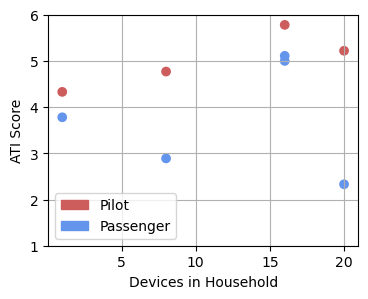

In [1]:
import logging
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

ati_data = [5.22, 2.33, 3.78, 4.33, 4.77, 2.89, 5, 5.78, 5.11]
devices_data = [20, 20, 1, 1, 8, 8, 16, 16, 16]
pilot_passenger_data = [1, 0, 0, 1, 1, 0, 0, 1, 0]


# Convert pilot_passenger_data to colors
colors = ['indianred' if user == 1 else 'cornflowerblue' for user in pilot_passenger_data]

# Create the scatter plot
fig = plt.figure(figsize=(4, 3))
dots = plt.scatter(devices_data, ati_data, c=colors)

patch_list = []
patch_list.append(mpatches.Patch(color='indianred', label='Pilot'))
patch_list.append(mpatches.Patch(color='cornflowerblue', label='Passenger'))

plt.ylim(1, 6)
# Add labels and title
plt.xlabel('Devices in Household')
plt.ylabel('ATI Score')
plt.legend(handles=patch_list, loc='lower left')
# plt.title('ATI vs Devices for Pilot (Red) and Passenger (Blue) Users')

# Show the plot
plt.grid(True)

# Save as a PNG file
plt.savefig('output/ati_vs_devices.png', bbox_inches='tight')

# Save as a PDF file
plt.savefig('output/ati_vs_devices.pdf', bbox_inches='tight')

plt.show()


In [8]:
import logging
from scipy.stats import pearsonr, spearmanr

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# ati_data = [5.22, 2.33, 3.78, 4.33, 4.77, 2.89, 5, 5.78, 5.11]
# devices_data = [20, 20, 1, 1, 8, 8, 16, 16, 16]
# pilot_passenger_data = [1, 0, 0, 1, 1, 0, 0, 1, 0]

ati_data = [5.22, 2.33, 3.78, 4.33, 4.77, 2.89, 5, 5.78, 5.11]
devices_data = [20, 20, 1, 1, 8, 8, 16, 16, 16]
pilot_passenger_data = [1, 0, 0, 1, 1, 0, 0, 1, 0]

# Filter data to only include pilot users
ati_data = [ati_data[i] for i in range(len(ati_data)) if pilot_passenger_data[i] == 1]
devices_data = [devices_data[i] for i in range(len(devices_data)) if pilot_passenger_data[i] == 1]

logger.info(f'ATI data: {ati_data}')

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(ati_data, devices_data)

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# same for ati and pilot_passenger
correlation_coefficient, p_value = spearmanr(ati_data, pilot_passenger_data)

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# same for devices and pilot_passenger
correlation_coefficient, p_value = spearmanr(devices_data, pilot_passenger_data)

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

INFO:__main__:ATI data: [5.22, 4.33, 4.77, 5.78]


Correlation coefficient: 0.7999999999999999
P-value: 0.20000000000000007


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4 and the array at index 1 has size 9